This is a Jupyter Notebook. It contains a combination of markdown and code cells. This is an example of a markdown cell where I can *change* **formatting** in:

* lots
* of
* different
* ways

You can double click on this cell to see the underlying markdown and edit it. "Execute" the cell by typing `Shift`+`Enter`

# This is a big header I made in markdown by putting a # at the front

More importantly, you can also add cells where you can execute Python code. Execute the cell below by clicking it and typing `Shift+Enter`.

In [2]:
total = 1 + 1
my_name = 'Brian'

print('1 + 1 = {0}'.format(1+1))
print('My name is {0}'.format(my_name))

1 + 1 = 2
My name is Brian


You can add, delete, and move cells as well. Add a cell below by typing `Control+M`, letting go, then press `B`. You can also go to "Insert" in the menu and select "Insert Cell Below".

You can delete cells by selecting the cell, typing `Ctrl+M`, letting go, then press `D` twice. You can also select the cell, go to "Edit" in the menu and select "Delete Cells."

You can move cells around with the up and down arrows in the toolbar above.

Here are some great resources on using Jupyter Notebooks:


* [Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Jupyter Notebook Quick Start Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html)
* [Gallery of Interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
* ["I Don't Like Notebooks"](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit)

## Get data from the web using `requests`

Let's revisit the structured Member Data the House of Representatives publishes about its members. Open this link in another tab to use as a reference: http://clerk.house.gov/xml/lists/MemberData.xml

We have to pretend to be a web browser in order for it to actually give us data. I would argue this is ethical in the context of getting data from a public institution for education and research, but faking headers or spoofing the "user agent" like this to get data from websites is not always ethical.

In [3]:
import requests

In [6]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

# Congress webmasters actually have nicely parsed member data into XML for you
house_raw = requests.get('http://clerk.house.gov/xml/lists/MemberData.xml',headers=headers).text

In [5]:
requests.get('http://clerk.house.gov/xml/lists/MemberData.xml').text

'<?xml version="1.0" encoding="UTF-8"?><MemberData publish-date="September 17, 2018"><title-info><congress-num>115</congress-num><congress-text>One Hundred Fifteenth Congress</congress-text><session>1</session><majority>R</majority><minority>D</minority><clerk>Karen L. Haas</clerk><weburl>http://clerk.house.gov</weburl></title-info><members><member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideID>Y000033</bioguideID><lastname>Young</lastname><firstname>Don</firstname><middlename/><sort-name>YOUNG,DON</sort-name><suffix/><courtesy>Mr.</courtesy><prior-congress>114</prior-congress><official-name>Don Young</official-name><formal-name>Mr. Young of Alaska</formal-name><party>R</party><caucus>R</caucus><state postal-code="AK"><state-fullname>Alaska</state-fullname></state><district>At Large</district><townname>Fort Yukon</townname><office-building>RHOB</office-building><office-room>2314</office-room><office-zip>20515</office-zip><office-zip-suffix>02

Inspect what's inside the `house_raw` object. It's text, but in a very structured format.

In [7]:
house_raw[:500]

'<?xml version="1.0" encoding="UTF-8"?><MemberData publish-date="September 17, 2018"><title-info><congress-num>115</congress-num><congress-text>One Hundred Fifteenth Congress</congress-text><session>1</session><majority>R</majority><minority>D</minority><clerk>Karen L. Haas</clerk><weburl>http://clerk.house.gov</weburl></title-info><members><member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideID>Y000033</bioguideID><lastname>Young</lastname><firstname>Do'

## Parse data using `BeautifulSoup`

Parse the text into something usable for Python using `BeautifulSoup`.

In [8]:
from bs4 import BeautifulSoup

house_soup = BeautifulSoup(house_raw,'lxml')

### Navigating soup

We can navigate down into the tree. We can access the children inside members by using the dot notation with `.members` and then parsing each child into a list of `<member>` objects with `contents`.

Here are the first 3 in that list.

In [12]:
house_soup.members.contents[:3]

[<member><statedistrict>AK00</statedistrict><member-info><namelist>Young, Don</namelist><bioguideid>Y000033</bioguideid><lastname>Young</lastname><firstname>Don</firstname><middlename></middlename><sort-name>YOUNG,DON</sort-name><suffix></suffix><courtesy>Mr.</courtesy><prior-congress>114</prior-congress><official-name>Don Young</official-name><formal-name>Mr. Young of Alaska</formal-name><party>R</party><caucus>R</caucus><state postal-code="AK"><state-fullname>Alaska</state-fullname></state><district>At Large</district><townname>Fort Yukon</townname><office-building>RHOB</office-building><office-room>2314</office-room><office-zip>20515</office-zip><office-zip-suffix>0200</office-zip-suffix><phone>(202) 225-5765</phone><elected-date date="20161108">November  8, 2016</elected-date><sworn-date date="20170103">January  3, 2017</sworn-date></member-info><committee-assignments><committee comcode="II00" rank="2"></committee><committee comcode="PW00" rank="2"></committee><subcommittee rank="2

How many members are there total? Hopefully 435, but it's actually 441 -- probably something worth looking into who these extra 6 are.

In [13]:
len(house_soup.members.contents)

441

We can get the names of all the states they represent. Here's a basic example of how to access the "state-fullname" for the first member's information.

In [16]:
house_soup.members.contents[0].find('state-fullname')

<state-fullname>Alaska</state-fullname>

We can access the text inside the tag with `.text`

In [17]:
house_soup.members.contents[0].find('state-fullname').text

'Alaska'

A list comprehension can get us all these "state_fullname"s, which we'll save as `member_states`.

In [19]:
member_states = [member.find('state-fullname').text for member in house_soup.members.contents]
member_states

['Alaska',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'American Samoa',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'Arizona',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'Cali

A `set` operation on the list will get us only the unique names. 

Sure enough, there's American Samoa, District of Columbia, Guam, Northern Mariana Islands, Puerto Rico, and Virgin Islands, which correspond to the extra 6 representatives (who are seated, but cannot vote on legislation).

In [20]:
set(member_states)

{'Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

There is also a "Committees" tree as well. Here is the first committee.

In [21]:
house_soup.committees.contents[0]

<committee com-building-code="LHOB" com-header-text="The chairman and ranking minority member are ex officio members of all subcommittees." com-phone="225-2171" com-room="1301" com-zip="20515" com-zip-suffix="6001" comcode="AG00" type="standing"><committee-fullname>Committee on Agriculture</committee-fullname><ratio><majority>26</majority><minority>20</minority></ratio><subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suffix="0" subcomcode="AG03"><subcommittee-fullname>Nutrition</subcommittee-fullname><ratio><majority>12</majority><minority>9</minority></ratio></subcommittee><subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suffix="0" subcomcode="AG14"><subcommittee-fullname>Biotechnology, Horticulture, and Research</subcommittee-fullname><ratio><majority>8</majority><minority>6</minority></ratio></subcommittee><subcommittee subcom-building-code="LHOB" subco

How many total committees?

In [22]:
len(house_soup.committees.contents)

27

What are the names of each committee? We can't access the "committee-fullname" attribute like we did before because of the hyphen. This should return a `NameError`.

In [23]:
house_soup.committees.contents[0].committee-fullname

NameError: name 'fullname' is not defined

Instead, we'll use "find" to get this tag's information.

In [24]:
house_soup.committees.contents[0].find('committee-fullname')

<committee-fullname>Committee on Agriculture</committee-fullname>

And use `text` to get the name of the committee.

In [25]:
house_soup.committees.contents[0].find('committee-fullname').text

'Committee on Agriculture'

Let's put it all together and make a list comprehension of all the committee names.

In [26]:
[committee.find('committee-fullname').text for committee in house_soup.committees.contents]

['Committee on Agriculture',
 'Committee on Appropriations',
 'Committee on Armed Services',
 'Committee on Financial Services',
 'Committee on the Budget',
 'Committee on Education and the Workforce',
 'Committee on Foreign Affairs',
 'Committee on Oversight and Government Reform',
 'Committee on House Administration',
 'Committee on Homeland Security',
 'Committee on Energy and Commerce',
 'Committee on Natural Resources',
 'Committee on the Judiciary',
 'Committee on Transportation and Infrastructure',
 'Committee on Rules',
 'Committee on Small Business',
 'Committee on Ethics',
 'Committee on Science, Space, and Technology',
 "Committee on Veterans' Affairs",
 'Committee on Ways and Means',
 'Permanent Select Committee on Intelligence',
 'Joint Economic Committee',
 'Joint Committee on Taxation',
 'Joint Select Committee on Budget and Appropriations Process Reform',
 'Joint Committee on the Library',
 'Joint Committee on Printing',
 'Joint Select Committee on Solvency of Multiempl

### Finding soup

Navigating soup can be helpful, but you likely have some tag in mind that you want to find. For that, we'll use the [`find_all`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all) function to find all the tags matching some criteria.

We pass the name of any tag and it will find all the instances of that tag. Here are those 441 members organized by their tag.

In [29]:
len(house_soup.find_all('member'))

441

But we could also get members' sworn-dates.

In [30]:
sworn_dates = house_soup.find_all('sworn-date')
sworn_dates[:10]

[<sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>]

In [33]:
set(sworn_dates)

{<sworn-date date=""></sworn-date>,
 <sworn-date date="20170103">January  3, 2017</sworn-date>,
 <sworn-date date="20170110">January 10, 2017</sworn-date>,
 <sworn-date date="20170425">April 25, 2017</sworn-date>,
 <sworn-date date="20170621">June 21, 2017</sworn-date>,
 <sworn-date date="20170626">June 26, 2017</sworn-date>,
 <sworn-date date="20170711">July 11, 2017</sworn-date>,
 <sworn-date date="20171113">November 13, 2017</sworn-date>,
 <sworn-date date="20180412">April 12, 2018</sworn-date>,
 <sworn-date date="20180507">May  7, 2018</sworn-date>,
 <sworn-date date="20180710">July 10, 2018</sworn-date>,
 <sworn-date date="20180905">September  5, 2018</sworn-date>}

These sworn dates have additional text and attributes, which might be helpful. For instance, the 121st record has a "sworn-date" of June 26, 2017.

We can access this 121st element in the list.

In [31]:
sworn_dates[121]

<sworn-date date="20170626">June 26, 2017</sworn-date>

And then access the "date" attribute (inside the tag) like a dictionary, which should return "20170626".

In [34]:
sworn_dates[121]['date']

'20170626'

Or access the text of the string itself, which should return "June 26, 2017"

In [35]:
sworn_dates[121].text

'June 26, 2017'

We could also use `find_all` to get the information about each committee's sub-committees. We can call `find_all` if we've navigated down into a part of the tree already. This should return only the subcommittees for the first committee in the list.

In [36]:
house_soup.committees.contents[0].find('committee-fullname').text

'Committee on Agriculture'

In [37]:
house_soup.committees.contents[0].find_all('subcommittee')

[<subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suffix="0" subcomcode="AG03"><subcommittee-fullname>Nutrition</subcommittee-fullname><ratio><majority>12</majority><minority>9</minority></ratio></subcommittee>,
 <subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suffix="0" subcomcode="AG14"><subcommittee-fullname>Biotechnology, Horticulture, and Research</subcommittee-fullname><ratio><majority>8</majority><minority>6</minority></ratio></subcommittee>,
 <subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suffix="0" subcomcode="AG15"><subcommittee-fullname>Conservation and Forestry</subcommittee-fullname><ratio><majority>8</majority><minority>6</minority></ratio></subcommittee>,
 <subcommittee subcom-building-code="LHOB" subcom-phone="225-2171" subcom-room="1301" subcom-zip="20515" subcom-zip-suff

Even better, we could just get the "subcommittee-fullname"s.

In [38]:
house_soup.committees.contents[0].find_all('subcommittee-fullname')

[<subcommittee-fullname>Nutrition</subcommittee-fullname>,
 <subcommittee-fullname>Biotechnology, Horticulture, and Research</subcommittee-fullname>,
 <subcommittee-fullname>Conservation and Forestry</subcommittee-fullname>,
 <subcommittee-fullname>General Farm Commodities and Risk Management</subcommittee-fullname>,
 <subcommittee-fullname>Commodity Exchanges, Energy, and Credit</subcommittee-fullname>,
 <subcommittee-fullname>Livestock and Foreign Agriculture</subcommittee-fullname>]

A simple list comprehension can turn this list of tags back into strings.

In [39]:
[sc.text for sc in house_soup.committees.contents[0].find_all('subcommittee-fullname')]

['Nutrition',
 'Biotechnology, Horticulture, and Research',
 'Conservation and Forestry',
 'General Farm Commodities and Risk Management',
 'Commodity Exchanges, Energy, and Credit',
 'Livestock and Foreign Agriculture']

We can tie this all together and make a dictionary keyed by the committee name with a list of sub-committees.

In [40]:
committees = {}

for committee in house_soup.committees.find_all('committee'):
    # Get the name of the committee
    committee_name = committee.find('committee-fullname').text
    
    # Get all the subcommittees inside this committee
    subcommittees = committee.find_all('subcommittee-fullname')
    
    # Subcommittee names
    subcommittee_names = [sc.text for sc in subcommittees]
    
    # Assign the committee name to the 
    committees[committee_name] = subcommittee_names
    
committees

{'Committee on Agriculture': ['Nutrition',
  'Biotechnology, Horticulture, and Research',
  'Conservation and Forestry',
  'General Farm Commodities and Risk Management',
  'Commodity Exchanges, Energy, and Credit',
  'Livestock and Foreign Agriculture'],
 'Committee on Appropriations': ['Agriculture, Rural Development, Food and Drug Administration, and Related Agencies',
  'Defense',
  'State, Foreign Operations, and Related Programs',
  'Interior, Environment, and Related Agencies',
  'Labor, Health and Human Services, Education, and Related Agencies',
  'Energy and Water Development, and Related Agencies',
  'Homeland Security',
  'Military Construction, Veterans Affairs and Related Agencies',
  'Commerce, Justice, Science, and Related Agencies',
  'Transportation, Housing and Urban Development, and Related Agencies',
  'Financial Services and General Government',
  'Legislative Branch'],
 'Committee on Armed Services': ['Military Personnel',
  'Readiness',
  'Oversight and Investig

### Building network of member-subcommittee assignments

In [41]:
house_soup.members.contents[13]

<member><statedistrict>AZ01</statedistrict><member-info><namelist>O'Halleran, Tom</namelist><bioguideid>O000171</bioguideid><lastname>O'Halleran</lastname><firstname>Tom</firstname><middlename></middlename><sort-name>OHALLERAN,TOM</sort-name><suffix></suffix><courtesy>Mr.</courtesy><prior-congress>0</prior-congress><official-name>Tom O'Halleran</official-name><formal-name>Mr. O'Halleran</formal-name><party>D</party><caucus>D</caucus><state postal-code="AZ"><state-fullname>Arizona</state-fullname></state><district>1st</district><townname>Sedona</townname><office-building>CHOB</office-building><office-room>126</office-room><office-zip>20515</office-zip><office-zip-suffix>0301</office-zip-suffix><phone>(202) 225-3361</phone><elected-date date="20161108">November  8, 2016</elected-date><sworn-date date="20170103">January  3, 2017</sworn-date></member-info><committee-assignments><committee comcode="AG00" rank="17"></committee><committee comcode="AS00" rank="26"></committee><subcommittee ran

Get the contents of the "committee-assignments" tag for this member as an example. We can see this includes the parent committees as well as the specific subcommittees. Unfortunately we only have codes for the committees and sub-committees.

In [42]:
house_soup.members.contents[13].find('committee-assignments').contents

[<committee comcode="AG00" rank="17"></committee>,
 <committee comcode="AS00" rank="26"></committee>,
 <subcommittee rank="5" subcomcode="AG15"></subcommittee>,
 <subcommittee rank="9" subcomcode="AG16"></subcommittee>,
 <subcommittee rank="5" subcomcode="AG22"></subcommittee>,
 <subcommittee rank="2" subcomcode="AS06"></subcommittee>,
 <subcommittee rank="9" subcomcode="AS25"></subcommittee>]

We could do a `.find_all('subcommittee')` to get only the subcommittee assignments.

In [43]:
[sc['subcomcode'] for sc in house_soup.members.contents[13].find_all('subcommittee')]

['AG15', 'AG16', 'AG22', 'AS06', 'AS25']

Let's map these subcommittee codes back to their full names.

In [44]:
subcommittee_codes_names = {}

for subcommittee in house_soup.committees.find_all('subcommittee'):
    code = subcommittee['subcomcode']
    name = subcommittee.find('subcommittee-fullname').text
    subcommittee_codes_names[code] = name

subcommittee_codes_names

{'AG03': 'Nutrition',
 'AG14': 'Biotechnology, Horticulture, and Research',
 'AG15': 'Conservation and Forestry',
 'AG16': 'General Farm Commodities and Risk Management',
 'AG22': 'Commodity Exchanges, Energy, and Credit',
 'AG29': 'Livestock and Foreign Agriculture',
 'AP01': 'Agriculture, Rural Development, Food and Drug Administration, and Related Agencies',
 'AP02': 'Defense',
 'AP04': 'State, Foreign Operations, and Related Programs',
 'AP06': 'Interior, Environment, and Related Agencies',
 'AP07': 'Labor, Health and Human Services, Education, and Related Agencies',
 'AP10': 'Energy and Water Development, and Related Agencies',
 'AP15': 'Homeland Security',
 'AP18': 'Military Construction, Veterans Affairs and Related Agencies',
 'AP19': 'Commerce, Justice, Science, and Related Agencies',
 'AP20': 'Transportation, Housing and Urban Development, and Related Agencies',
 'AP23': 'Financial Services and General Government',
 'AP24': 'Legislative Branch',
 'AS02': 'Military Personnel',

With these examples in hand, write a loop that makes a bipartite edgelist of members and their sub-committee assignments.

In [45]:
import pandas as pd

In [46]:
member_subcommittee_edgelist = []

for member in house_soup.members.contents:
    member_name = member.find('sort-name').text
    members_subcommittees = member.find_all('subcommittee')
    for sc in members_subcommittees:
        edge = (member_name,sc['subcomcode'],sc['rank'])
        member_subcommittee_edgelist.append(edge)
        
member_subcommittee_df = pd.DataFrame(member_subcommittee_edgelist,columns=['Member','Code','Rank'])
member_subcommittee_df['Name'] = member_subcommittee_df['Code'].map(subcommittee_codes_names)
member_subcommittee_df.head()

,Member,Code,Rank,Name
0,"YOUNG,DON",II10,2,Federal Lands
1,"YOUNG,DON",II24,2,"Indian, Insular and Alaska Native Affairs"
2,"YOUNG,DON",PW05,2,Aviation
3,"YOUNG,DON",PW07,2,Coast Guard and Maritime Transportation
4,"YOUNG,DON",PW12,2,Highways and Transit


Have to do a bit of work to give the nodes colors.

In [47]:
member_colors = {member_name:'blue' for member_name in member_subcommittee_df['Member'].unique()}
subcommittee_colors = {sc:'green' for sc in member_subcommittee_df['Name'].unique()}
combined = {**member_colors,**subcommittee_colors}

Try to visualize the network.

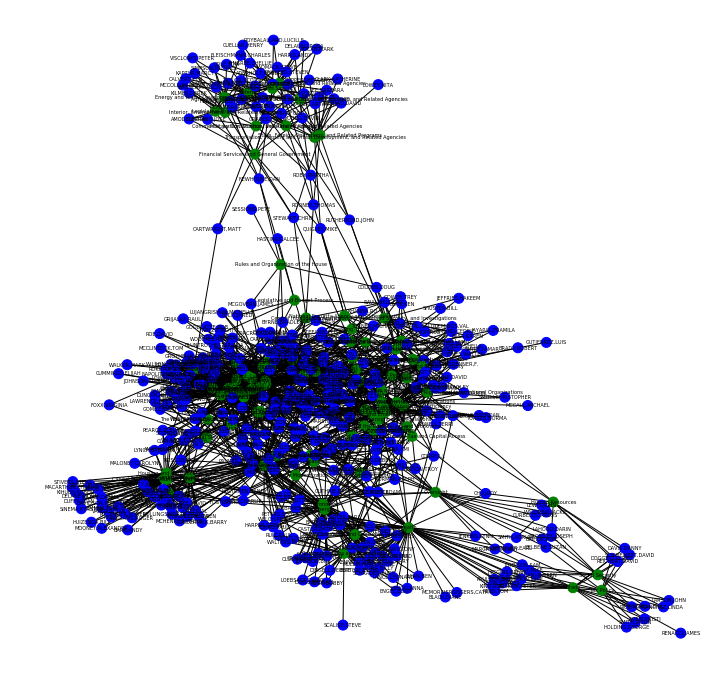

In [49]:
# networkx is a network analysis library in Python
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Take the pandas edgelist and turn it into a networkx graph object
g = nx.from_pandas_edgelist(member_subcommittee_df,source='Member',target='Name',edge_attr=True)

# Make the node colors
node_colors = [combined[n] for n in g.nodes()]

# Compute the note positions
g_pos = nx.spring_layout(g,scale=1000,iterations=50)

# Draw the graph
f,ax = plt.subplots(figsize=(12,12))
nx.draw(G = g,
        ax = ax,
        pos = g_pos,
        with_labels = True,
        node_size = 100,
        font_size = 5,
        node_color = node_colors,
        width = 1
       )

We can also project this two-mode network down to one-mode of sub-committees linked to sub-committees if they share members in common.

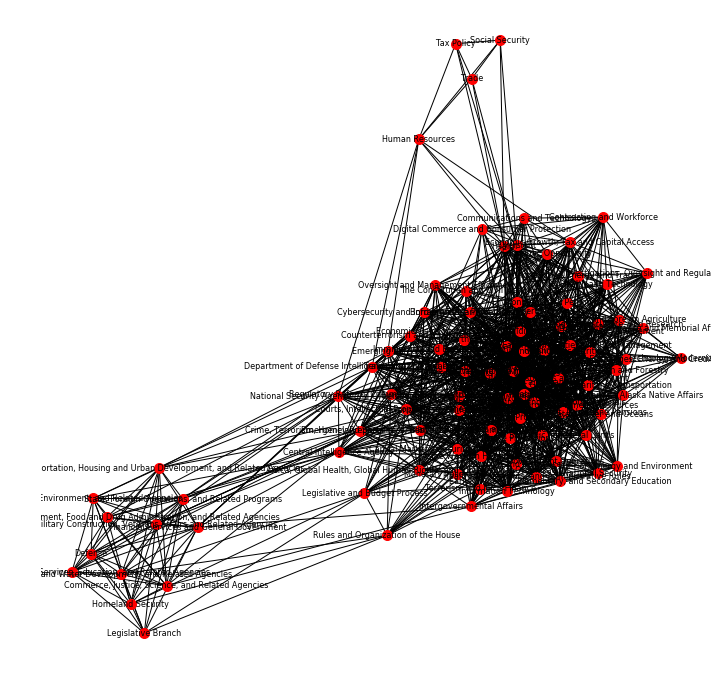

In [51]:
wpg = nx.bipartite.weighted_projected_graph(g,nodes = member_subcommittee_df['Name'])

# Compute the note positions
wpg_pos = nx.spring_layout(wpg,scale=1000,iterations=50)

# Draw the graph
f,ax = plt.subplots(figsize=(12,12))
nx.draw(G = wpg,
        ax = ax,
        pos = wpg_pos,
        with_labels = True,
        node_size = 100,
        font_size = 8,
        width = 1
       )

## JSON from Twitter

Below is an example of a [tweet status](https://dev.twitter.com/overview/api/tweets) object that Twitter's [API returns](https://dev.twitter.com/rest/reference/get/statuses/show/id). This `obama_tweet` dictionary corresponds to [this tweet](https://twitter.com/BarackObama/status/831527113211645959).

In [52]:
obama_tweet = {'created_at': 'Tue Feb 14 15:34:47 +0000 2017',
               'favorite_count': 1023379,
               'hashtags': [],
               'id': 831527113211645959,
               'id_str': '831527113211645959',
               'lang': 'en',
               'media': [{'display_url': 'pic.twitter.com/O0UhJWoqGN',
                          'expanded_url': 'https://twitter.com/BarackObama/status/831527113211645959/photo/1',
                          'id': 831526916398149634,
                          'media_url': 'http://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'media_url_https': 'https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'sizes': {'large': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'medium': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'small': {'h': 453, 'resize': 'fit', 'w': 680},
                                    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
                          'type': 'photo',
                          'url': 'https://t.co/O0UhJWoqGN'}],
               'retweet_count': 252266,
               'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
               'text': 'Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new. https://t.co/O0UhJWoqGN',
               'urls': [],
               'user': {'created_at': 'Mon Mar 05 22:08:25 +0000 2007',
                        'description': 'Dad, husband, President, citizen.',
                        'favourites_count': 10,
                        'followers_count': 84814791,
                        'following': True,
                        'friends_count': 631357,
                        'id': 813286,
                        'lang': 'en',
                        'listed_count': 221906,
                        'location': 'Washington, DC',
                        'name': 'Barack Obama',
                        'profile_background_color': '77B0DC',
                        'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/451819093436268544/kLbRvwBg.png',
                        'profile_banner_url': 'https://pbs.twimg.com/profile_banners/813286/1484945688',
                        'profile_image_url': 'http://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX_normal.jpg',
                        'profile_link_color': '2574AD',
                        'profile_sidebar_fill_color': 'C2E0F6',
                        'profile_text_color': '333333',
                        'screen_name': 'BarackObama',
                        'statuses_count': 15436,
                        'time_zone': 'Eastern Time (US & Canada)',
                        'url': 'https://t.co/93Y27HEnnX',
                        'utc_offset': -18000,
                        'verified': True},
               'user_mentions': [{'id': 409486555,
                                  'name': 'Michelle Obama',
                                  'screen_name': 'MichelleObama'}]}

When was this tweet created?

In [53]:
obama_tweet['created_at']

'Tue Feb 14 15:34:47 +0000 2017'

What's the text of the tweet?

In [54]:
obama_tweet['text']

'Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new. https://t.co/O0UhJWoqGN'

Who wrote the tweet?

In [57]:
obama_tweet['user']['name']

'Barack Obama'

How many times was the tweet retweeted and favorited?

In [58]:
obama_tweet['retweet_count']

252266

In [59]:
obama_tweet['favorite_count']

1023379

Who does this tweet mention?

In [60]:
obama_tweet['user_mentions']

[{'id': 409486555, 'name': 'Michelle Obama', 'screen_name': 'MichelleObama'}]

What images are in the tweet?

In [63]:
obama_tweet['media'][0]['media_url']

'http://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg'

Let's look at the image!

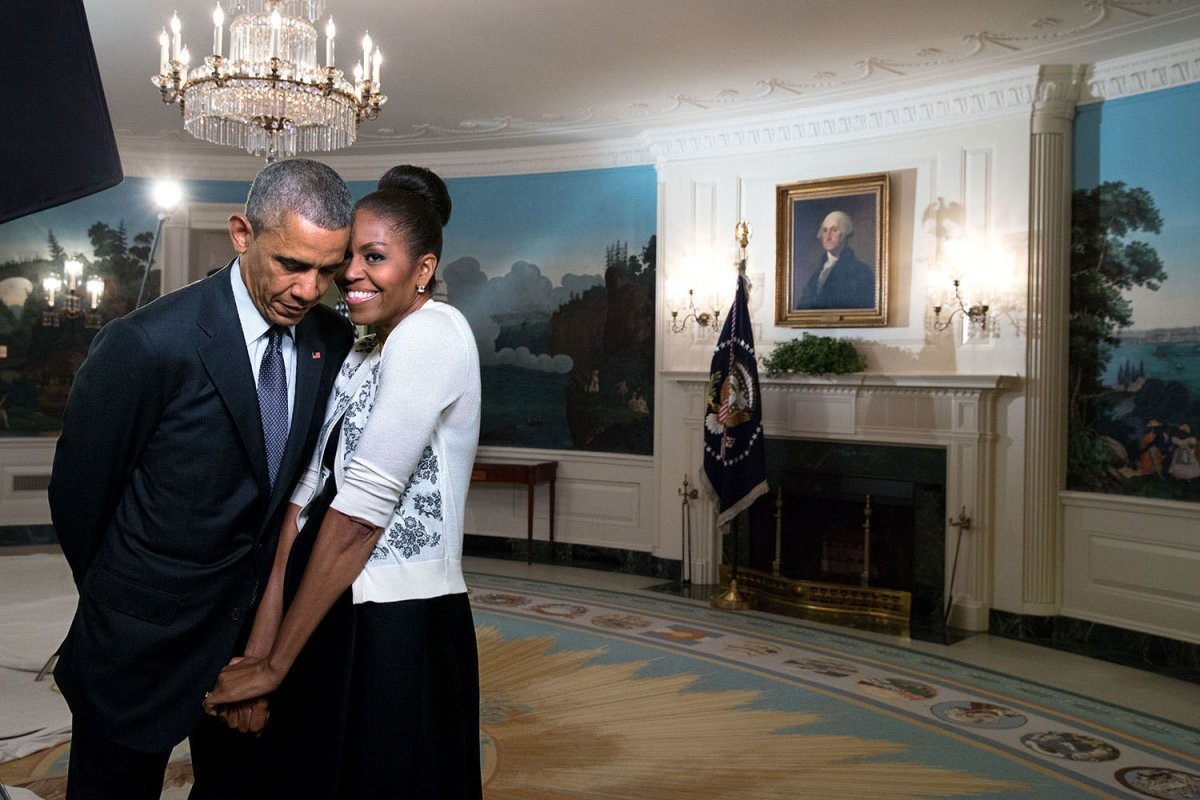

In [64]:
from IPython.display import Image
Image(obama_tweet['media'][0]['media_url'])

## Getting data from the Wikipedia API

Wikipedia stores every single change that's been made to every one of its articles (in all its languages!) since approximately 2002. You can view [the revision history here](https://en.wikipedia.org/w/index.php?title=University_of_Colorado_Boulder&action=history) for the [University of Colorado Boulder](https://en.wikipedia.org/wiki/University_of_Colorado_Boulder) article. You can also access this data programatically via the "[revision](https://www.mediawiki.org/wiki/API:Revisions)" endpoint in Wikipedia's API.

In [66]:
hash('Brian likes cookies')

-5139211198699688089

In [68]:
hash('Brian likes cookies')

-5139211198699688089

In [69]:
hash('Brian likes cookies') == hash('Brian likes cookies')

True

In [65]:
import requests                      # Import the requests library to let us talk to APIs

# Make a request dictionary with all the parameters the Wikipedia API wants for requests to use
request = {}                         # Start with an empty dictionary
request['action'] = 'query'          # Talk to the query end-point of the API
request['format'] = 'json'           # Return the data in JSON format
request['prop'] = 'revisions'        # Get the revisions of an article
request['titles'] = "University of Colorado Boulder"    # Get the data for an article
request['rvlimit'] = 10             # Get the 100 most recent revisions to the article
request['formatversion'] = 2         # Output the data in a friendlier version
request['rvdir'] = 'older'           # Output the data in a friendlier version

# Ask for specific properties of every revision, joining them together by pipes "|"
# User is the username, 
# ids is the unique revision id
# size is the number of characters in the content
# sha1 is the hash of the article version
# include "content" if you want the wikitext markup generating the article's content
request['rvprop'] = '|'.join(['user','timestamp','ids','size','sha1'])

# Make the request to Wikipedia's API and use the .json() method to return JSON response to a Python dictionary
result = requests.get('http://en.wikipedia.org/w/api.php', params=request).json()

# Look at the results
result

{'continue': {'rvcontinue': '20180907173224|858506363', 'continue': '||'},
 'query': {'pages': [{'pageid': 289672,
    'ns': 0,
    'title': 'University of Colorado Boulder',
    'revisions': [{'revid': 860375696,
      'parentid': 860375661,
      'user': '108.34.186.243',
      'anon': True,
      'timestamp': '2018-09-20T07:20:00Z',
      'size': 67037,
      'sha1': '96276c9b439926fbe38dc43e4b537a5706fec867'},
     {'revid': 860375661,
      'parentid': 860313358,
      'user': '108.34.186.243',
      'anon': True,
      'timestamp': '2018-09-20T07:19:37Z',
      'size': 67038,
      'sha1': '3ca377c4d558dc3189a35df32ae21107a953a6f4'},
     {'revid': 860313358,
      'parentid': 860117622,
      'user': '63.157.15.10',
      'anon': True,
      'timestamp': '2018-09-19T20:16:16Z',
      'size': 67042,
      'sha1': 'a53f213986499ec26410f3a85bea44d2592dcd78'},
     {'revid': 860117622,
      'parentid': 859637172,
      'user': 'Kvng',
      'timestamp': '2018-09-18T13:17:54Z',
    

This is fundamentally tabular data, so let's use the pandas library to turn the data into a tabular structure.

In [70]:
import pandas as pd
pd.DataFrame(result['query']['pages'][0]['revisions'])

,anon,parentid,revid,sha1,size,timestamp,user
0,True,860375661,860375696,96276c9b439926fbe38dc43e4b537a5706fec867,67037,2018-09-20T07:20:00Z,108.34.186.243
1,True,860313358,860375661,3ca377c4d558dc3189a35df32ae21107a953a6f4,67038,2018-09-20T07:19:37Z,108.34.186.243
2,True,860117622,860313358,a53f213986499ec26410f3a85bea44d2592dcd78,67042,2018-09-19T20:16:16Z,63.157.15.10
3,NaN,859637172,860117622,f534efef63c8351d95e6e8b7adece78d90c722e0,67327,2018-09-18T13:17:54Z,Kvng
4,NaN,859427483,859637172,79234aa662642b0305f472e4f99072d97281f29d,67744,2018-09-15T09:08:18Z,Akrokerama
5,True,859427252,859427483,57dad3003c1fc9e2afbff6b3bfbc34078f47d0c1,67718,2018-09-14T00:26:07Z,2601:281:8201:5E0:DD87:956E:FAD:CD4E
6,True,859426934,859427252,ffedbe5dc4ff3c44fab6449c5dc120632675694f,67678,2018-09-14T00:23:59Z,2601:281:8201:5E0:DD87:956E:FAD:CD4E
7,True,859283874,859426934,6e080abb3b0016a9222085ddb2284748b564e9fc,67261,2018-09-14T00:21:03Z,2601:281:8201:5E0:DD87:956E:FAD:CD4E
8,NaN,858914753,859283874,9899ca08a290fa8b68ce87f9f86f3e7035c9781d,67100,2018-09-13T01:07:20Z,Smasongarrison
9,NaN,858506363,858914753,c4c584bf20e26173e23c04e3d4c6dc60639a95c4,67059,2018-09-10T13:42:03Z,Kvng


## Getting HTML data from Wikipedia

Wikipedia interestingly has what appears to be a pretty exhaustive collection of data about historical school shootings in the United States: https://en.wikipedia.org/wiki/List_of_school_shootings_in_the_United_States

Wikipedia gets really cranky when you try to use `requests.get()` directly on its articles and prefers that you get the data from its API instead. Let's respect their wishes and get the data from the API.

In [71]:
# Make a request dictionary with all the parameters the Wikipedia API wants for requests to use
request = {}                         # Start with an empty dictionary
request['action'] = 'parse'          # Talk to the "parse" end-point of the API
request['format'] = 'json'           # Return the data in JSON format (for now)
request['prop'] = 'text|sections'    # Get the HTML markup of an article
request['formatversion'] = 2         # Output the data in a friendlier version
request['page'] = 'List of school shootings in the United_States'
#request['section'] = 38              # Only get the HTML for a specific section "Historical details" is the 34th
request['disabletoc'] = True         # Simplify things a bit
request['disableeditsection'] = True # Simplify things a bit

# Make the request to Wikipedia's API and use the .json() method to return JSON response to a Python dictionary
school_shootings_json = requests.get('http://en.wikipedia.org/w/api.php', params=request).json()

# The HTML for the page lives in here as a big string
school_shootings_html = school_shootings_json['parse']['text']

Convert the raw HTML string to Soup so we can do things to it.

In [72]:
school_shootings_soup = BeautifulSoup(school_shootings_html,'html.parser')

Find all the tables in the soup.

In [73]:
school_shootings_tables = school_shootings_soup.find_all('table')
print("There are a total of {0:,} tables in the data.".format(len(school_shootings_tables)))

There are a total of 19 tables in the data.


What does one of them look like?

In [74]:
school_shootings_tables[0]

<table class="sortable wikitable" style="font-size:100%;">
<tbody><tr>
<th style="width:80px;">Date
</th>
<th style="width:140px;">Location
</th>
<th style="width:40px;">Deaths
</th>
<th style="width:40px;">Injuries
</th>
<th class="unsortable">Description
</th></tr>
<tr>
<td><span data-sort-value="000000001840-11-12-0000" style="white-space:nowrap">November 12, 1840</span>
</td>
<td><span data-sort-value="Charlottesville, Virginia !"><a href="/wiki/Charlottesville,_Virginia" title="Charlottesville, Virginia">Charlottesville, Virginia</a></span>
</td>
<td>1
</td>
<td>0
</td>
<td>John Anthony Gardner Davis, a law professor at the <a href="/wiki/University_of_Virginia" title="University of Virginia">University of Virginia</a>, was shot by student Joseph Semmes, and died from his wound three days later.<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup><sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
</td></tr></tbody></table>

There's 18 of these tables and they're pretty gnarly to parse. Luckily pandas has a [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function that will (try to!) turn this mess into something tabular.

Let's take the most recent sub-table (`school_shootings_tables[-1]`), cast it back to a string (`str`), tell pandas to use the first row as a header (`header=0`).

In [75]:
pd.read_html(str(school_shootings_tables[-1]),header=0)[0].tail()

,Date,Location,Deaths,Injuries,Description
77,"August 20, 2018","Atlanta, Georgia",0,0,A shootout on the campus of Georgia State Univ...
78,"August 30, 2018","San Francisco, California",0,1,One student was injured when two students were...
79,"September 5, 2018","Providence, Rhode Island",1,1,"William Parsons, a 15-year-old student at Cent..."
80,"September 10, 2018","Memphis, Tennessee",0,1,A teen girl was injured after shots were fired...
81,"September 11, 2018","Las Vegas, Nevada",1,0,A 18 year old student was shot at Canyon Sprin...


Loop through the list of tables in `school_shootings_tables` and conver them to DataFrames and concatenate them all together into a list of all the shootings.

In [76]:
# Start with an empty list
table_list = []

# Write a loop to go over every table in the list of tables
for table in school_shootings_tables:
    
    # Pull out the table and parse it into a DataFrame
    _df = pd.read_html(str(table),header=0)[0]
    
    # Add the parsed table back to the table_list
    table_list.append(_df)
    
# Concatenate the list of tables into a giant table of all the shootings
shootings_df = pd.concat(table_list)

# Parse the Date column into a proper datetime, coercing bad dates to something close
shootings_df['Date'] = pd.to_datetime(shootings_df['Date'],errors='coerce')

# Inspect the 5 most recent shootings
shootings_df.tail()

,Date,Location,Deaths,Injuries,Description
77,2018-08-20,"Atlanta, Georgia",0,0,A shootout on the campus of Georgia State Univ...
78,2018-08-30,"San Francisco, California",0,1,One student was injured when two students were...
79,2018-09-05,"Providence, Rhode Island",1,1,"William Parsons, a 15-year-old student at Cent..."
80,2018-09-10,"Memphis, Tennessee",0,1,A teen girl was injured after shots were fired...
81,2018-09-11,"Las Vegas, Nevada",1,0,A 18 year old student was shot at Canyon Sprin...


Plot out the cumulative number of deaths over time according to this data.

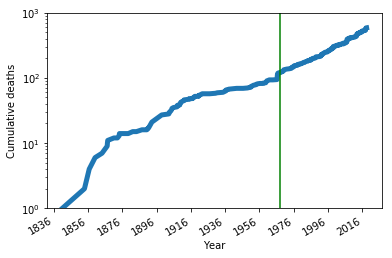

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

# Pull out only the Date and Deaths columns, reshape, and cumulatively sum
cumulative_shootings = shootings_df[['Date','Deaths']].set_index('Date')['Deaths'].cumsum()

# Create a plot
ax = cumulative_shootings.plot(lw=5)

# Log-scale the y-axis and set limits to 1e0 thru 1e3
ax.set_yscale('log')
ax.set_ylim((1e0,1e3))

# Always label your axes!
ax.set_ylabel('Cumulative deaths')
ax.set_xlabel('Year')

# Include a reference line for a major piece of legislation
ax.axvline(pd.Timestamp('1968-01-01'),c='g') # Gun Control Act of 1968
#ax.axvline(pd.Timestamp('1977-01-01'),c='r') # NRA Cincinnati Revolution of 1977

## Getting data from Twitter's API*

In [97]:
import twitter
tweet_id = '440322224407314432'
consumer = '5hnXwxRdIjgvb6dXE7lcw5e7W'
consumer_secret = 'IaI5u8Mu96Cvc4GXf5JEHiGQaSQxwRHGsIiIeg4rAcbANCPHX5'
access = '16629994-NbeuzldlAktPWuAlAF340G98LNPBWcg5C8ovOruYd'
access_secret = 'YxmH91NMVf0YfL6NNVZxC4Q3TrHj4x1ZMMPFlqwsLF7he'

api = twitter.Api(consumer, consumer_secret, access, access_secret,tweet_mode='extended')

status = api.GetStatus(tweet_id)
status

Status(ID=440322224407314432, ScreenName=TheEllenShow, Created=Mon Mar 03 03:06:13 +0000 2014, Text="If only Bradley's arm was longer. Best photo ever. #oscars http://t.co/C9U5NOtGap")

In [107]:
tweets = api.GetUserTimeline(screen_name='realDonaldTrump',count=200)

In [108]:
len(tweets)

200

In [129]:
import seaborn as sb
import numpy as np

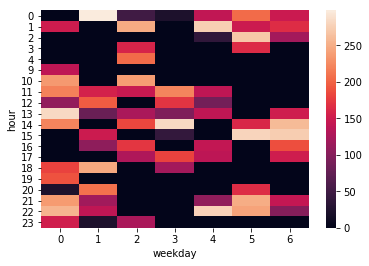

In [135]:
tweet_data = []

for t in tweets:
    created_at = t.created_at
    text = t.full_text
    tweet_data.append({'text':text,'timestamp':created_at})
    
df = pd.DataFrame(tweet_data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['length'] = df['text'].apply(len)
df['hour'] = df['timestamp'].apply(lambda x:x.hour)
df['weekday'] = df['timestamp'].apply(lambda x:x.weekday())

ct = pd.crosstab(index=df['hour'],columns=df['weekday'],values=df['length'],aggfunc=np.mean).fillna(0)
sb.heatmap(ct)

#sb.factorplot(x='hour',y='length',data=df,aspect=2)

In [114]:
dir(tweets[0])

['AsDict',
 'AsJsonString',
 'NewFromJsonDict',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_json',
 'contributors',
 'coordinates',
 'created_at',
 'created_at_in_seconds',
 'current_user_retweet',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'hashtags',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'lang',
 'location',
 'media',
 'param_defaults',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'scopes',
 'source',
 'text',
 'truncated',
 'tweet_mode',
 'urls',
 'user',
 'user_mentions',
 'withheld_c

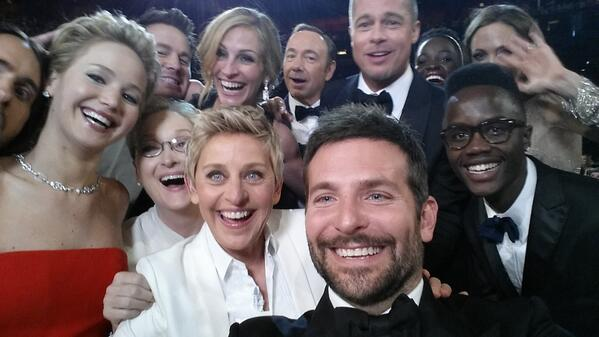

In [85]:
status.AsDict()['media'][0]['media_url']

## Hydroelectric dams in Brazil

In [79]:
# Make a request dictionary with all the parameters the Wikipedia API wants for requests to use
request = {}                         # Start with an empty dictionary
request['action'] = 'query' # Talk to the "parse" end-point of the API
request['list'] = 'categorymembers'
request['format'] = 'json'           # Return the data in JSON format (for now)
request['formatversion'] = 2         # Output the data in a friendlier version
request['cmtitle'] = 'Category:Hydroelectric power stations in Brazil'
request['cmlimit'] = 500

# Make the request to Wikipedia's API and use the .json() method to return JSON response to a Python dictionary
json = requests.get('http://en.wikipedia.org/w/api.php', params=request).json()

json

{'batchcomplete': True,
 'query': {'categorymembers': [{'pageid': 50543122,
    'ns': 0,
    'title': 'List of hydroelectric power stations in Brazil'},
   {'pageid': 28876897, 'ns': 0, 'title': 'Água Vermelha Dam'},
   {'pageid': 44320476, 'ns': 0, 'title': 'Apollonius Sales power station'},
   {'pageid': 12313178, 'ns': 0, 'title': 'Balbina Dam'},
   {'pageid': 28796161,
    'ns': 0,
    'title': 'Barra Grande Hydroelectric Power Plant'},
   {'pageid': 11204315, 'ns': 0, 'title': 'Belo Monte Dam'},
   {'pageid': 44331971, 'ns': 0, 'title': 'Bernard Mascarenhas Power Plant'},
   {'pageid': 18543672,
    'ns': 0,
    'title': 'Boa Esperança Hydroelectric Power Plant'},
   {'pageid': 53193975, 'ns': 0, 'title': 'Cachoeira do Cai Dam'},
   {'pageid': 53198719, 'ns': 0, 'title': 'Cachoeira dos Patos Dam'},
   {'pageid': 53204541, 'ns': 0, 'title': 'Jamanxim Dam'},
   {'pageid': 53201222, 'ns': 0, 'title': 'Jardim do Ouro Dam'},
   {'pageid': 6530402, 'ns': 0, 'title': 'Campos Novos Dam'},

In [81]:
# Make a request dictionary with all the parameters the Wikipedia API wants for requests to use
request = {}                         # Start with an empty dictionary
request['action'] = 'query' # Talk to the "parse" end-point of the API
request['prop'] = 'links'
request['format'] = 'json'           # Return the data in JSON format (for now)
request['formatversion'] = 2         # Output the data in a friendlier version
request['titles'] = 'List of hydroelectric power stations in Brazil'
request['pllimit'] = 500

# Make the request to Wikipedia's API and use the .json() method to return JSON response to a Python dictionary
json = requests.get('http://en.wikipedia.org/w/api.php', params=request).json()

json

{'batchcomplete': True,
 'query': {'pages': [{'pageid': 50543122,
    'ns': 0,
    'title': 'List of hydroelectric power stations in Brazil',
    'links': [{'ns': 0, 'title': 'Alagoas'},
     {'ns': 0, 'title': 'Amazonas (Brazilian state)'},
     {'ns': 0, 'title': 'Araguari'},
     {'ns': 0, 'title': 'Bahia'},
     {'ns': 0, 'title': 'Balbina Dam'},
     {'ns': 0, 'title': 'Barra Grande Hydroelectric Power Plant'},
     {'ns': 0, 'title': 'Belo Monte Dam'},
     {'ns': 0, 'title': 'Bento Munhoz Hydroelectric Plant'},
     {'ns': 0, 'title': 'Berilo'},
     {'ns': 0, 'title': 'Bernard Mascarenhas Power Plant'},
     {'ns': 0, 'title': 'Billings Dam'},
     {'ns': 0, 'title': 'Boa Esperança Hydroelectric Power Plant'},
     {'ns': 0, 'title': 'Brazil'},
     {'ns': 0, 'title': 'Buritama'},
     {'ns': 0, 'title': 'Campos Novos Dam'},
     {'ns': 0, 'title': 'Capivara Dam'},
     {'ns': 0, 'title': 'Chacorão Dam'},
     {'ns': 0, 'title': 'Colider Dam'},
     {'ns': 0, 'title': 'Delfinóp